In [3]:
import os 

import pycoco as pcc

In [14]:
output_dir = "/Users/berto/projects/SDSS_sims/lcs/"
outlist = os.listdir(output_dir)

In [15]:
outlist

['.DS_Store', 'SN_000001.dat', 'SN_000002.dat', 'SN_000003.dat']

/Users/berto/projects/SDSS_sims/lcs/SN_000001.dat


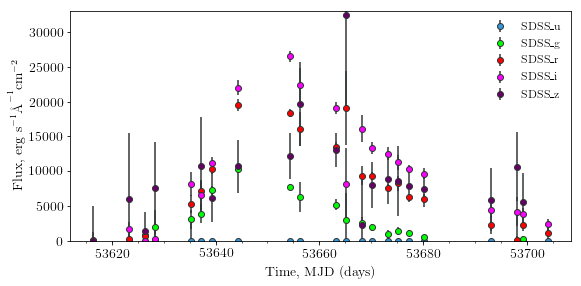

/Users/berto/projects/SDSS_sims/lcs/SN_000002.dat


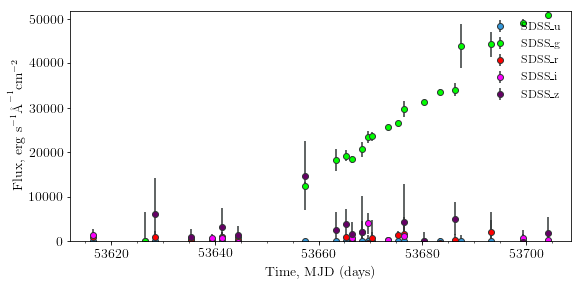

/Users/berto/projects/SDSS_sims/lcs/SN_000003.dat


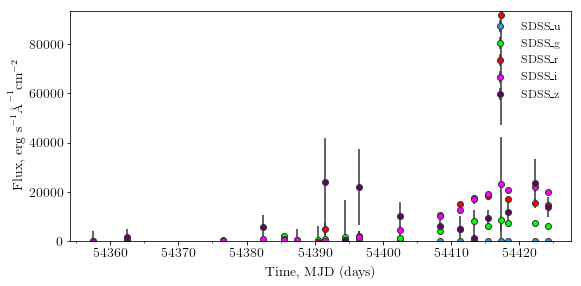

In [23]:
verbose = True
for i, snpath in enumerate(outlist):
    if snpath != '.DS_Store':
        snpath = os.path.join(output_dir, snpath)
        if verbose: print(snpath)
        p = pcc.PhotometryClass()
        p.load(snpath)
        
        p.plot()

In [6]:
p = pcc.PhotometryClass()
p.load(snpath)

In [8]:
x = str(x)

In [13]:
x.rjust(6, "0")

'000001'

In [25]:
locals()

{'In': ['',
  'import pycoco as pcc',
  'output_dir = "/Users/berto/projects/SDSS_sims/lcs/"\noutlist = os.listdir(output_dir)',
  'import os \n\nimport pycoco as pcc',
  'output_dir = "/Users/berto/projects/SDSS_sims/lcs/"\noutlist = os.listdir(output_dir)',
  'outlist',
  'x = 1',
  'x = str(x)',
  'x = str(x)',
  "get_ipython().magic('pinfo x.format')",
  'x.ljust()',
  "get_ipython().magic('pinfo x.ljust')",
  'x.ljust(6, "0")',
  'x.rjust(6, "0")',
  'output_dir = "/Users/berto/projects/SDSS_sims/lcs/"\noutlist = os.listdir(output_dir)',
  'outlist',
  "for snpath in outlist if snpath is not '.DS_Store':",
  "for snpath in outlist if snpath not '.DS_Store':",
  "for snpath in outlist:\n    if snpath not '.DS_Store':\n        print(snpath)",
  "for snpath in outlist:\n    if snpath !== '.DS_Store':\n        print(snpath)",
  "for snpath in outlist:\n    if snpath != '.DS_Store':\n        print(snpath)",
  "verbose = True\nfor snpath in outlist:\n    if snpath != '.DS_Store':\n     

TypeError: str() argument 2 must be str, not int